#Escolhendo modelo de carreta: CBH, CBHM, FTC, F, FA

In [1]:
modelo_carreta = 'F'

#Importando bibliotecas e tratando dados

In [2]:
#pip install pycaret-ts-alpha

In [3]:
from pycaret.time_series import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
arquivo = '/content/BASE VENDAS ATUALIZADA.xlsx'

df = pd.read_excel(arquivo, parse_dates=['ds'])
df['MOD08'].unique()

array(['CBHM', 'CBH', 'F', 'FTC', 'FA', 'P.A', 'ROBUSTA'], dtype=object)

In [5]:
#selecionando modelo de carreta

selecao = (df.MOD08 == modelo_carreta)
df1 = df[selecao]

#deixando apenas colunas necessárias

df1 = df1[['ds','y']]
df1 = df1.sort_values(by='ds')

Text(0.5, 1.0, 'Total Sales received By year')

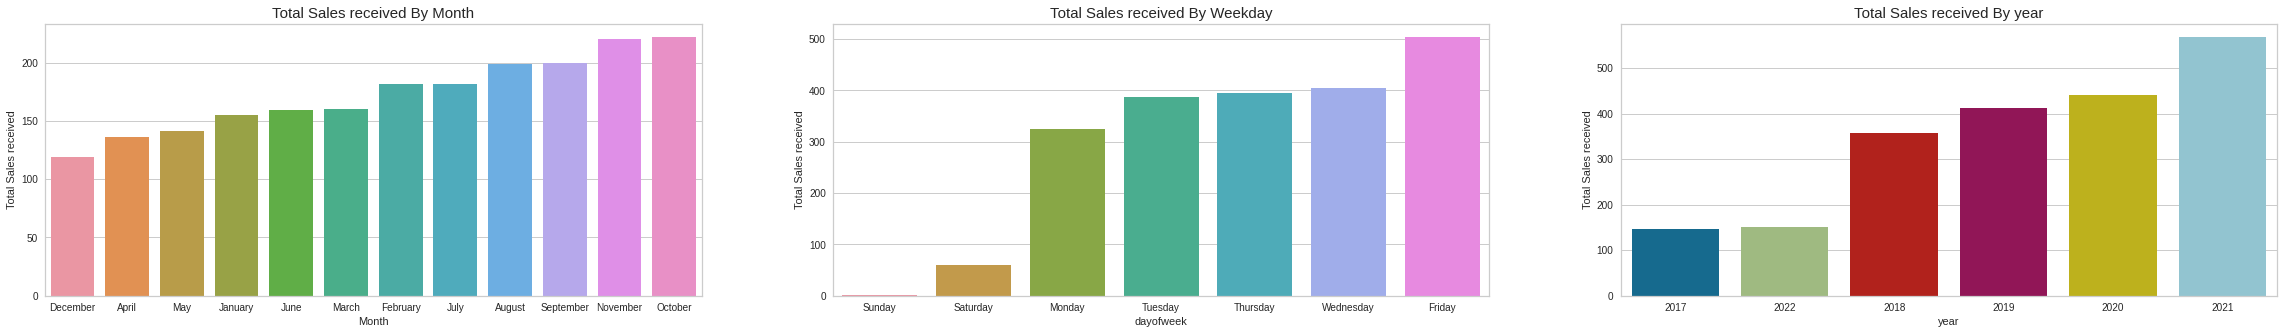

In [6]:
df1['ds'] = df1.ds
df1['month'] = df1['ds'].dt.strftime('%B')
df1['year'] = df1['ds'].dt.strftime('%Y')
df1['dayofweek'] = df1['ds'].dt.strftime('%A')
df1['dayofyear'] = df1['ds'].dt.dayofyear
df1['dayofmonth'] = df1['ds'].dt.day
df1['weekofyear'] = df1['ds'].dt.weekofyear

fig1,(ax1,ax2,ax3)= plt.subplots(ncols = 3)
fig1.set_size_inches(40,5)

monthAggregated = pd.DataFrame(df1.groupby("month")["y"].sum()).reset_index().sort_values('y')
sns.barplot(data=monthAggregated,x="month",y="y",ax=ax1)
ax1.set(xlabel='Month', ylabel='Total Sales received')
ax1.set_title("Total Sales received By Month",fontsize=15)

monthAggregated = pd.DataFrame(df1.groupby("dayofweek")["y"].sum()).reset_index().sort_values('y')
sns.barplot(data=monthAggregated,x="dayofweek",y="y",ax=ax2)
ax2.set(xlabel='dayofweek', ylabel='Total Sales received')
ax2.set_title("Total Sales received By Weekday",fontsize=15)

#monthAggregated = pd.DataFrame(df1.groupby("quarter")["y"].sum()).reset_index().sort_values('y')
#sns.barplot(data=monthAggregated,x="quarter",y="y",ax=ax3)
#ax3.set(xlabel='Quarter', ylabel='Total Sales received')
#ax3.set_title("Total Sales received By Quarter",fontsize=15)

monthAggregated = pd.DataFrame(df1.groupby("year")["y"].sum()).reset_index().sort_values('y')
sns.barplot(data=monthAggregated,x="year",y="y",ax=ax3)
ax3.set(xlabel='year', ylabel='Total Sales received')
ax3.set_title("Total Sales received By year",fontsize=15)

In [7]:
df1 = df1.set_index('ds')
df1 = df1.resample('M').sum()
df1 = df1.reset_index()

<AxesSubplot:>

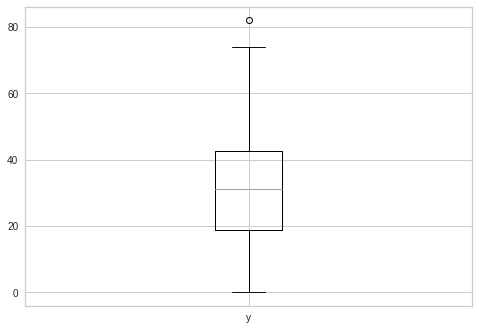

In [8]:
df1.boxplot(['y'])

In [9]:
valor = df1['y']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
df1 = df1[selecao]

<AxesSubplot:>

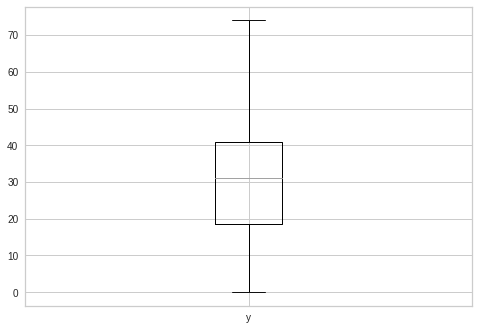

In [10]:
df1.boxplot(['y'])

In [11]:
# extract month and year from dates**
#df1['Month'] = [i.month for i in df1['ds']]
#df1['Year'] = [i.year for i in df1['ds']]

In [12]:
Month = [i.month for i in df1['ds']]
Year = [i.year for i in df1['ds']]

In [13]:
import numpy as np
X = np.array([Month, Year]).T

In [14]:
df1.max()

ds            2022-05-31 00:00:00
y                              74
dayofyear                   23968
dayofmonth                   1442
weekofyear                   3481
dtype: object

In [15]:
df1.tail(20)

,ds,y,dayofyear,dayofmonth,weekofyear
44,2020-10-31,40,11806,846,1715
45,2020-11-30,74,23968,1398,3481
46,2020-12-31,38,13233,503,1920
47,2021-01-31,70,1083,1083,164
48,2021-02-28,38,1678,500,242
49,2021-03-31,40,3158,798,458
50,2021-04-30,56,7135,1195,1033
51,2021-05-31,31,4264,544,611
52,2021-06-30,56,9612,1156,1384
53,2021-07-31,64,13026,1442,1872


In [16]:
Y_month = [6,7,8,9,10,11,12]
Y_year = [2022,2022,2022,2022,2022,2022,2022]
Y_index = [65,66,67,68,69,70,71]

Y = np.array([Y_month, Y_year,Y_index]).T

In [17]:
data_df = pd.DataFrame(Y)
data_df = data_df.set_index(2)

In [18]:
Y = np.array([Y_month, Y_year]).T

[]

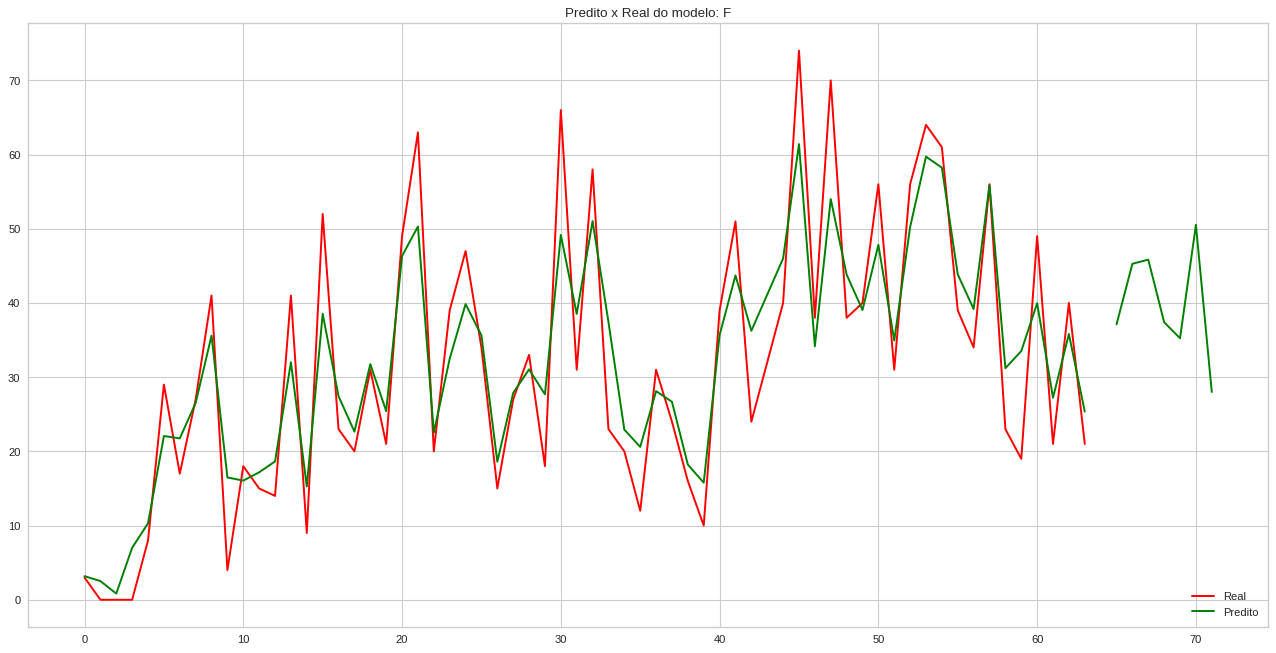

In [19]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X, df1.y.values)
 
# predict on the same period
preds = my_rf.predict(X)
preds1 = my_rf.predict(Y)
preds1
 
# plot what has been learned
figure(figsize=(20, 10), dpi=80)
plt.plot(df1.index, df1.y.values,color='red')
plt.plot(df1.index,preds,color='green')
plt.plot(data_df.index, preds1,color='green')
plt.title("Predito x Real do modelo: " + modelo_carreta)
plt.legend(["Real", "Predito"], loc ="lower right")


plt.plot()

In [20]:
preds1

array([37.12, 45.28, 45.84, 37.4 , 35.24, 50.52, 28.  ])

[14:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


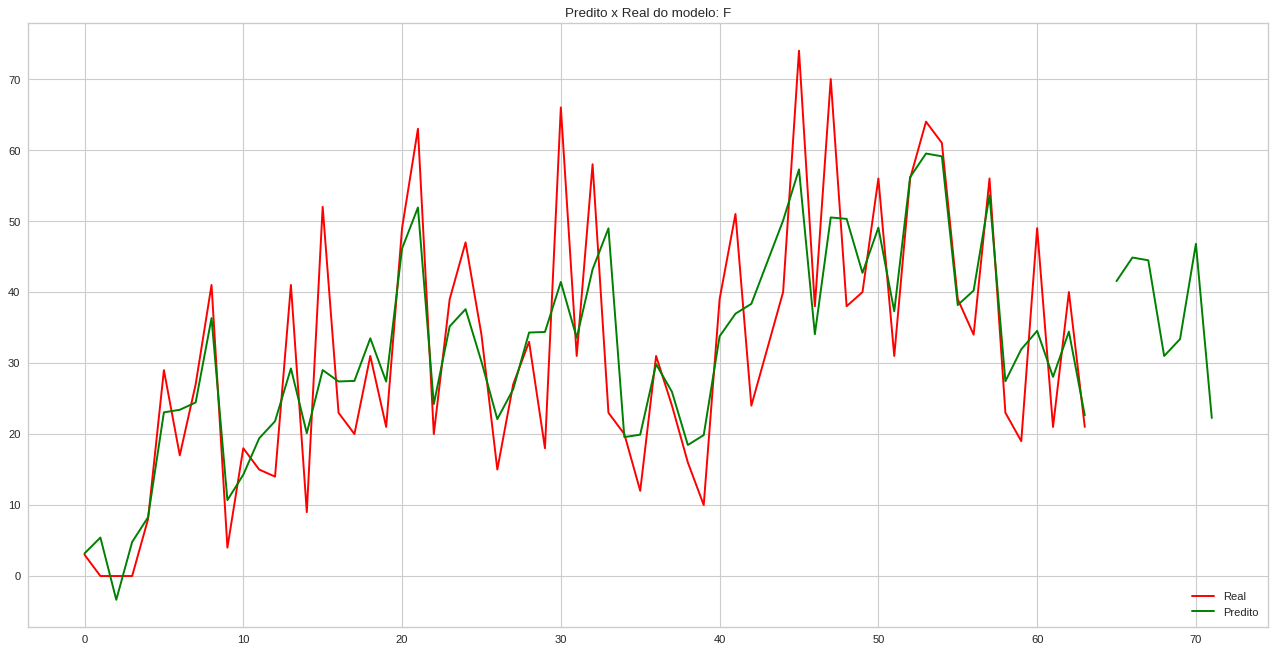

In [21]:
import xgboost as xgb
 
# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(X, df1.y.values)
 
# predict on the same period
preds = my_xgb.predict(X)
preds1 = my_xgb.predict(Y)

# plot what has been learned
figure(figsize=(20, 10), dpi=80)
plt.plot(df1.index, df1.y.values,color='red')
plt.plot(df1.index,preds,color='green')
plt.plot(data_df.index, preds1,color='green')
plt.title("Predito x Real do modelo: " + modelo_carreta)
plt.legend(["Real", "Predito"], loc ="lower right")

In [22]:
preds1

array([41.541485, 44.86228 , 44.470665, 30.991816, 33.372517, 46.795456,
       22.261448], dtype=float32)